In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk



In [2]:
# reads the data set from the file
data = pd.read_csv("KaggleV2-May-2016.csv")

# DATA EXPLORATION

In [3]:
#displays first 5 rows of the data
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#data size rows*colums
data.shape

(110527, 14)

In [5]:
# data set colums
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#gives the statistical values for each column eg: mean, SD, max
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#checking unique values for each column
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Checking for missing values 

In [9]:
#checking if NaN values exist
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
# checking if empty values exist
data.eq(" ").sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Variable distribution and relationship with target variable

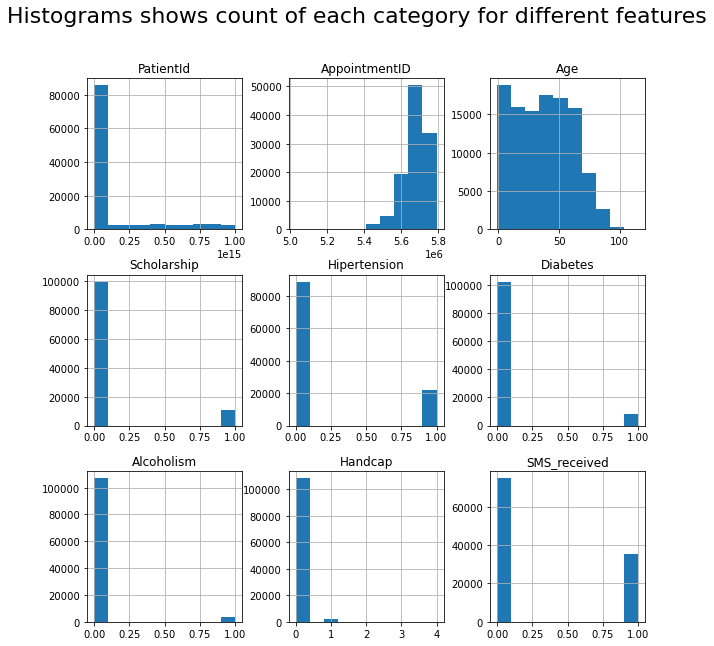

In [11]:
data.hist(figsize=(10,10))
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);
#Only colums with numeric data gets plotted

In [12]:
#changing No-show column data from categorical to binary values i.e Yes/No to 0/1
#No-show=YES => didnt show up YES=0, 
#No-show=NO  => did show up NO=1,
data = data.replace({'No-show': {'Yes': 0, 'No': 1}}) 

#changing Gender column data from categorical to binary values i.e M/F to 0/1 
#Assigning M=0 , F=1
data = data.replace({'Gender': {'F': 1, 'M': 0}}) 

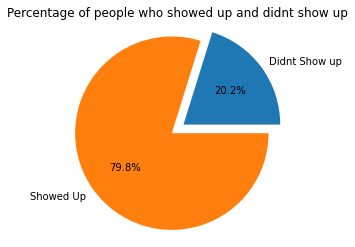

In [13]:
#pie chart for count of people who showed up and who didnt show up
no_show = (data["No-show"]==0).sum()
show = (data["No-show"]==1).sum()
noShow_data = [no_show,show]
noShow_labels = ["Didnt Show up","Showed Up"]
plt.pie(noShow_data, labels=noShow_labels, explode=(0,0.15), autopct='%1.1f%%')
plt.title('Percentage of people who showed up and didnt show up')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='No-show', ylabel='count'>

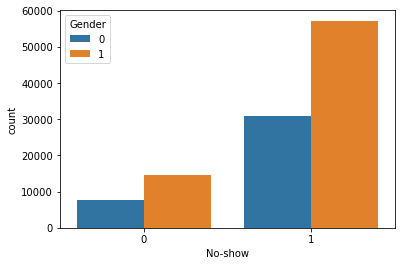

In [14]:
#Male and females who showed-up and who didnt show up
sns.countplot(x="No-show",hue="Gender", data=data)

<AxesSubplot:xlabel='No-show', ylabel='count'>

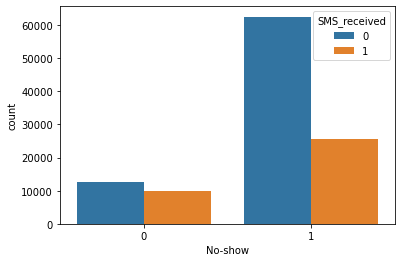

In [15]:
#SMS received and not received patients who showed up and didnt show up
sns.countplot(x="No-show",hue="SMS_received", data=data)

In [16]:
# Unique values of age
data['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [17]:
#row having age = -1
data.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,1,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


In [18]:
# dropping the row having age=-1
#data = data.drop(data.index[99832], inplace=True)
data = data.loc[data['Age'] != -1]
data.shape



(110526, 14)

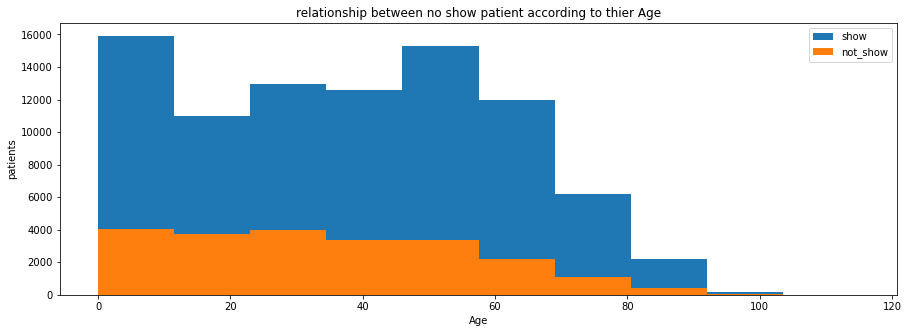

In [19]:
df=data.copy()
show= df['No-show'] == 1
not_show= df['No-show'] == 0
df[show].head()

df.Age[show].plot(kind= 'hist', label= 'show',figsize=(15,5));
df.Age[not_show].plot(kind= 'hist', label= 'not_show',figsize=(15,5));
plt.legend()
plt.ylabel('patients');
plt.xlabel('Age');
plt.title('relationship between no show patient according to thier Age');



<AxesSubplot:xlabel='No-show', ylabel='Age'>

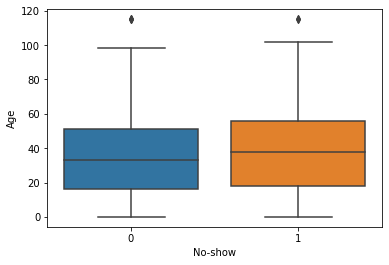

In [20]:
sns.boxplot(x="No-show", y="Age", data=data)

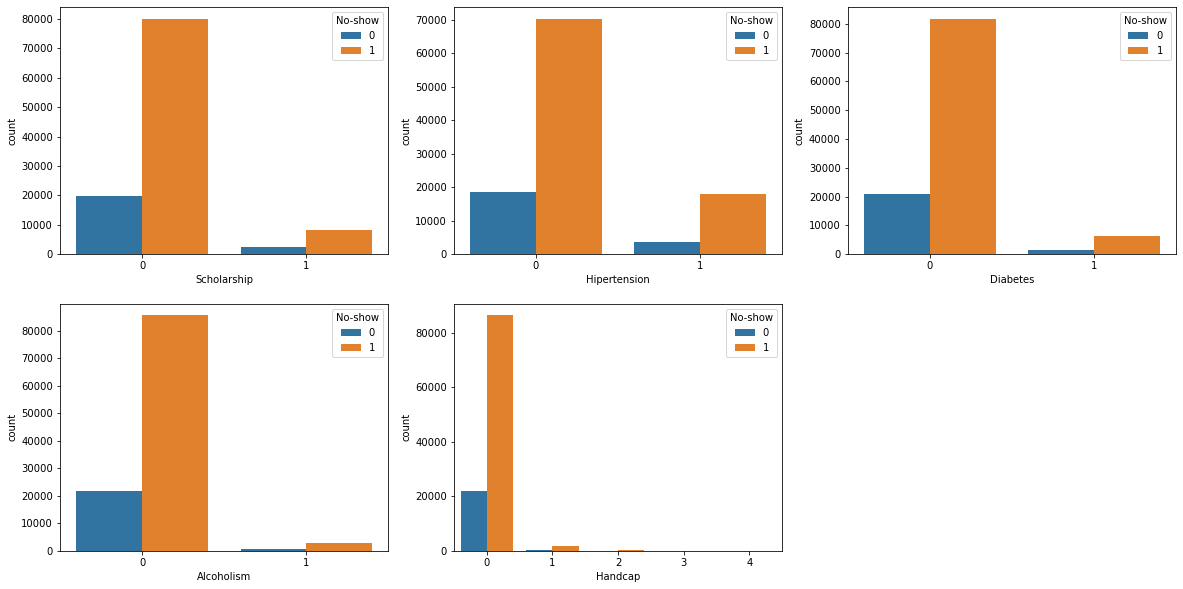

In [21]:
# Distribution of show and no show for patients with diabetes, hypertension, alcoholism, handicap and scholarship
def get_bar_chart(data):
    labels = ['Scholarship','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
    plt.figure(figsize=(20,10))  
    for i in enumerate(labels):
        plt.subplot(2, 3, i[0]+1)
        sns.countplot(x=i[1], hue='No-show' ,data=data)
    plt.show()
    
get_bar_chart(data) 

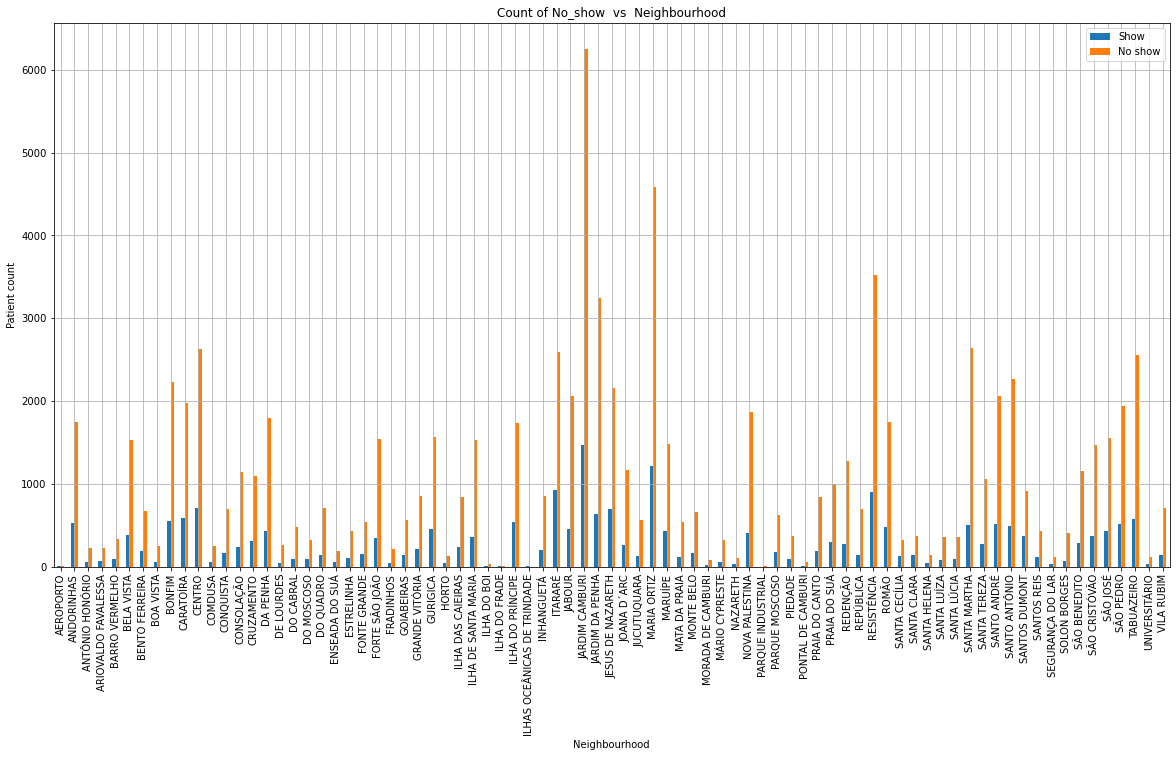

In [22]:
#Relation of neighbourhood on no-show
x=data.groupby(["Neighbourhood","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(20,10),grid=True);
plt.title("Count of No_show  vs  Neighbourhood") #change title for the plot
plt.legend(["Show", "No show"]); 
plt.ylabel("Patient count");
 

In [23]:
df=data.groupby("PatientId")["No-show"].value_counts()
df.head(20)



PatientId     No-show
3.921784e+04  1          1
4.374176e+04  1          1
9.377953e+04  1          1
1.417242e+05  1          1
5.376153e+05  1          1
5.628261e+06  0          1
1.183186e+07  1          1
2.263866e+07  1          2
5.216894e+07  1          2
5.422400e+07  1          1
6.143378e+07  1          1
6.249793e+07  1          1
6.485121e+07  0          1
              1          1
7.838548e+07  1          1
7.922850e+07  1          2
8.658474e+07  1          1
8.799645e+07  0          1
              1          1
9.531312e+07  1          1
Name: No-show, dtype: int64

In [24]:
#Calculating no. of days between appointment day and scheduled day

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date

data["Duration"] = data['AppointmentDay']  - data['ScheduledDay'] 
data["Duration"]=data["Duration"].dt.days
data["Duration"].max()
data.groupby("No-show")["Duration"].max()
data.query('Duration<0')



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration
27033,7.839273e+12,5679978,0,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1
55226,7.896294e+12,5715660,1,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1
64175,2.425226e+13,5664962,1,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-1
71533,9.982316e+14,5686628,1,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-6
72362,3.787482e+12,5655637,0,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,-1


In [25]:
# removing negative values of Duration as appointment day > scheduled day cannot occur

data = data.loc[data['Duration'] >= 0]
data.shape

(110521, 15)

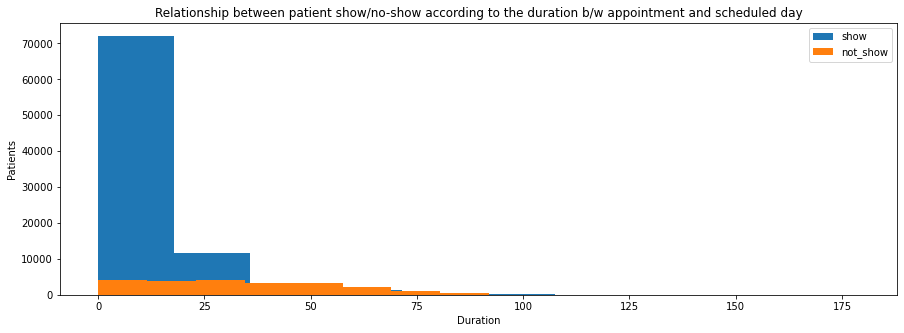

In [26]:
#graph plot to show relation between no-show and duration 

df=data.copy()
show = df['No-show'] == 1
not_show= df['No-show'] == 0
df[show].head()

df.Duration[show].plot(kind= 'hist', label= 'show',figsize=(15,5));
df.Age[not_show].plot(kind= 'hist', label= 'not_show',figsize=(15,5));
plt.legend()
plt.ylabel('Patients');
plt.xlabel('Duration');
plt.title('Relationship between patient show/no-show according to the duration b/w appointment and scheduled day');

In [27]:
#unique values in each column
data.nunique()


PatientId          62298
AppointmentID     110521
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
Duration             129
dtype: int64

# CORRELATION MATRIX

In [28]:
#Corelation matrix for showing relationship between prdictors and target variables

corealtion_matrix = data.corr()

In [29]:
corealtion_matrix

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration
PatientId,1.000000,0.004019,-0.007927,-0.004192,-0.002873,-0.006431,0.001612,0.011016,-0.007855,-0.009735,0.001477,-0.001442
AppointmentID,0.004019,1.000000,-0.018512,-0.019109,0.022620,0.012760,0.022633,0.032947,0.014077,-0.256614,0.162619,-0.771840
Gender,-0.007927,-0.018512,1.000000,0.106439,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132,0.028411
Age,-0.004192,-0.019109,0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320,0.034813
Scholarship,-0.002873,0.022620,0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166,-0.030435
Hipertension,-0.006431,0.012760,0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662,-0.017236
Diabetes,0.001612,0.022633,0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158,-0.027200
Alcoholism,0.011016,0.032947,-0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181,-0.038527
Handcap,-0.007855,0.014077,-0.022787,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290,-0.019774
SMS_received,-0.009735,-0.256614,0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502,0.398128


In [30]:
corealtion_matrix.style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration
PatientId,1.000000,0.004019,-0.007927,-0.004192,-0.002873,-0.006431,0.001612,0.011016,-0.007855,-0.009735,0.001477,-0.001442
AppointmentID,0.004019,1.000000,-0.018512,-0.019109,0.022620,0.012760,0.022633,0.032947,0.014077,-0.256614,0.162619,-0.771840
Gender,-0.007927,-0.018512,1.000000,0.106439,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132,0.028411
Age,-0.004192,-0.019109,0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320,0.034813
Scholarship,-0.002873,0.022620,0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166,-0.030435
Hipertension,-0.006431,0.012760,0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662,-0.017236
Diabetes,0.001612,0.022633,0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158,-0.027200
Alcoholism,0.011016,0.032947,-0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181,-0.038527
Handcap,-0.007855,0.014077,-0.022787,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290,-0.019774
SMS_received,-0.009735,-0.256614,0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502,0.398128


# MODEL BUILDING

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve,auc



In [32]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


scoring = {'Accuracy' : make_scorer(accuracy_score), 
           'Precision' : make_scorer(precision_score),
           'Recall' : make_scorer(recall_score), 
           'F1_Score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=0, shuffle=True)

data.reset_index(inplace = True)

Y = data["No-show"]
X = data[['Gender', 'Age', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'Duration', 'Scholarship']]




In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver='liblinear')
predictions = cross_val_predict(model1, X, Y, cv=10)
results = cross_validate(estimator=model1, X=X, y=Y, cv=kfold, scoring=scoring)
print("predictions: ", predictions)
print("Accuracy: ",np.mean(results['test_Accuracy']))
print("Precision: ",np.mean(results['test_Precision']))
print("Recall: ",np.mean(results['test_Recall']))
print("F1 score: ",np.mean(results['test_F1_Score']))
matrix = confusion_matrix(Y, predictions)
print("confusion matrix:\n",matrix)


predictions:  [1 1 1 ... 1 1 1]
Accuracy:  0.7939938795208386
Precision:  0.7998399340889759
Recall:  0.9895018204154612
F1 score:  0.8846143394212953
confusion matrix:
 [[  442 21872]
 [ 1064 87143]]


In [34]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
results = cross_validate(estimator=model2, X=X, y=Y, cv=kfold, scoring=scoring)
predictions = cross_val_predict(model2, X, Y, cv=10)
print("predictions: ", predictions)
print("Accuracy: ",np.mean(results['test_Accuracy']))
print("Precision: ",np.mean(results['test_Precision']))
print("Recall: ",np.mean(results['test_Recall']))
print("F1 score: ",np.mean(results['test_F1_Score']))
matrix = confusion_matrix(Y, predictions)
print("confusion matrix:\n",matrix)


predictions:  [1 1 1 ... 0 1 1]
Accuracy:  0.7815799276797455
Precision:  0.8054383412212426
Recall:  0.9576582211334832
F1 score:  0.8749716214351183
confusion matrix:
 [[ 1876 20438]
 [ 3774 84433]]


In [35]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
results = cross_validate(estimator=model3, X=X, y=Y, cv=kfold, scoring=scoring)
predictions = cross_val_predict(model3, X, Y, cv=10)
print("predictions: ", predictions)
print("Accuracy: ",np.mean(results['test_Accuracy']))
print("Precision: ",np.mean(results['test_Precision']))
print("Recall: ",np.mean(results['test_Recall']))
print("F1 score: ",np.mean(results['test_F1_Score']))
matrix = confusion_matrix(Y, predictions)
print("confusion matrix:\n",matrix)


predictions:  [1 1 1 ... 1 1 1]
Accuracy:  0.75900508110185
Precision:  0.8216519160997275
Recall:  0.8915407718128945
F1 score:  0.8551654996648527
confusion matrix:
 [[ 4850 17464]
 [10077 78130]]


In [36]:
# XGBoost
from xgboost import XGBClassifier

model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
results = cross_validate(estimator=model4, X=X, y=Y, cv=kfold, scoring=scoring)
predictions = cross_val_predict(model4, X, Y, cv=10)
print("predictions: ", predictions)
print("Accuracy: ",np.mean(results['test_Accuracy']))
print("Precision: ",np.mean(results['test_Precision']))
print("Recall: ",np.mean(results['test_Recall']))
print("F1 score: ",np.mean(results['test_F1_Score']))
matrix = confusion_matrix(Y, predictions)
print("confusion matrix:\n",matrix)

predictions:  [1 1 1 ... 1 1 1]
Accuracy:  0.7965906724743699
Precision:  0.800715845758886
Recall:  0.9920282678704
F1 score:  0.8861595009186758
confusion matrix:
 [[  424 21890]
 [  885 87322]]


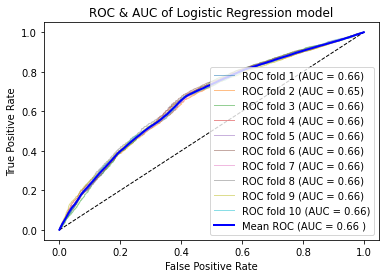

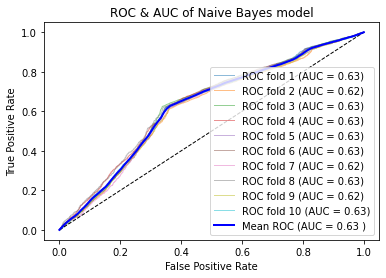

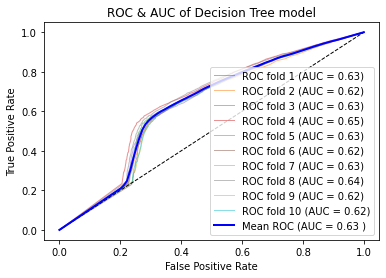

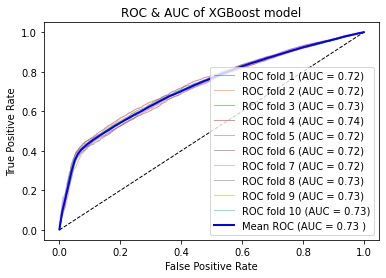

In [37]:
import matplotlib.pylab as plt
from scipy import interp
import matplotlib.patches as patches


models = [model1, model2, model3, model4]
model_names =['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'XGBoost']
j=0
for m in models:
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in kfold.split(X,Y):
        prediction = m.fit(X.iloc[train],Y.iloc[train]).predict_proba(X.iloc[test])
        fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    plt.plot([0,1],[0,1],linestyle = '--',lw=1, color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
   

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    title = 'ROC & AUC of '+ model_names[j] + ' model'
    plt.title(title)
    j+=1
    plt.legend(loc="lower right")
    plt.show()